In [124]:
import numpy as np
from matplotlib import pyplot
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from functools import reduce

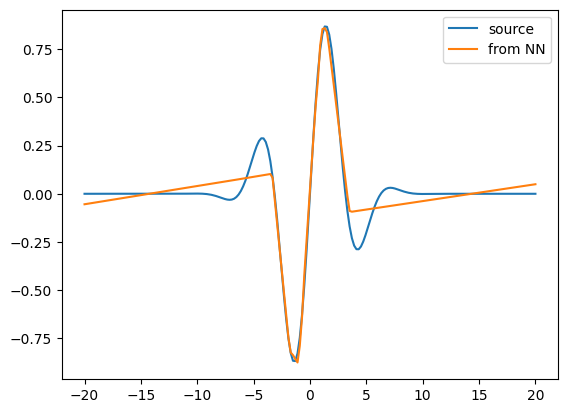

In [53]:
#simple use of Keras, NN is taught to recreate a plot of a function

network=Sequential()
network.add(Dense(20,activation='relu',input_shape=(1,)))
network.add(Dense(20,activation='relu'))
network.add(Dense(1,activation='linear'))
network.compile(loss='mse',optimizer='adam')

def function(x):
    return np.sin(x)*np.exp(-x**2/16.0)

Niter=2000
batch=100

cost=np.zeros(Niter)

for n in range(Niter):
    Xtr=np.random.uniform(-20,20,[batch,1])
    Ytr=function(Xtr)
    cost[n]=network.train_on_batch(Xtr,Ytr)
    print(f"it={n:} cost={cost[n]:.5}",end="           \r")

Xin=np.transpose([np.linspace(-20.0,20.0,200)])
Yout=function(Xin)
Ynet=network.predict_on_batch(Xin)

pyplot.plot(Xin,Yout,label="source")
pyplot.plot(Xin,Ynet,label="from NN")
pyplot.legend()
pyplot.show()



In [163]:
test_net=Sequential()
test_net.add(Dense(3,input_shape=(2,)))
test_net.add(Dense(4))
test_net.add(Dense(1))
test_net.layers[1].get_weights()

[array([[ 5.0744236e-02, -6.7490971e-01,  7.7416396e-01,  9.0772903e-01],
        [-5.5132300e-01, -3.3366573e-01,  2.8623819e-01,  6.1575353e-02],
        [-4.5824051e-04,  5.8783436e-01, -1.5824658e-01,  9.1025734e-01]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32)]

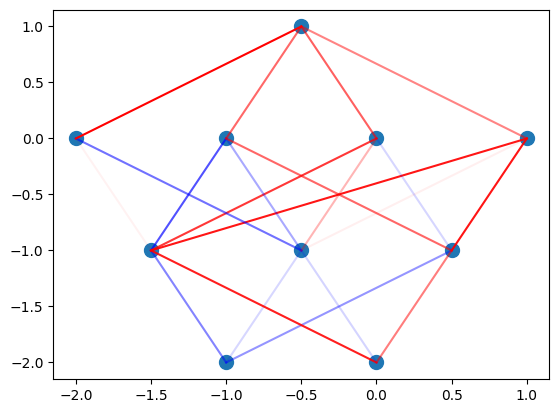

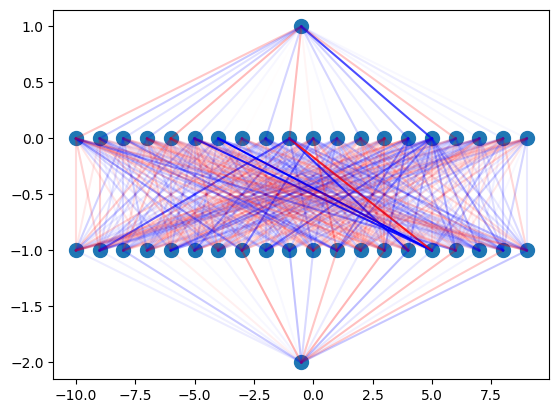

In [164]:
#visualization of connection strength between neurons, color saturation is proportional to weight (blue - negative, red - positive)
def line(x0,y0,x1,y1):
    if x0!=x1:
        x_data=np.linspace(x0,x1,10)
        y_data=y0+(x_data-x0)*(y1-y0)/(x1-x0)
    else:
        y_data=np.linspace(y0,y1,10)
        x_data=[x0]*len(y_data)
    return x_data,y_data

def color_fun(w):
    color_min=[0,0,1.0]
    color_max=[1.0,0,0]
    #color_zero=[1,1,1]
    color=color_min if w<=0 else color_max
    #w=np.abs(w)
    return color #[w*color[i]+(1.0-w)*color_zero[i] for i in range(3)]
    
def find_maximum(model):
    N=len(model.layers)
    tmp=[np.max(np.abs(model.layers[i].get_weights()[0])) for i in range(N)]
    return np.max(tmp)
    

def network_visualization(model):
    Nrows=len(model.layers)+1
    Ncols=[len(model.layers[i].get_weights()[0]) if i<Nrows-1 else len(model.layers[i-1].get_weights()[1]) for i in range(Nrows)]

    neuron_Ys=[[-Nrows/2+i for j in range(Ncols[i])] for i in range(Nrows) ]#[[Nrows/2-i]*Ncols[i] for i in range(Nrows)]
    neuron_Xs=[[-Ncols[i]/2+j for j in range(Ncols[i])] for i in range(Nrows)]#[[-Ncols[i]/2+j for j in range(Ncols[i]) ] for i in range(Nrows)]
    
    fig,plot=pyplot.subplots()

    plot.scatter(reduce(lambda x,y: x+y,neuron_Xs),reduce(lambda x,y: x+y,neuron_Ys),s=100)

    wmax=find_maximum(model)
    for i in range(Nrows-1):
        for j in range(Ncols[i]):
            for k in range(Ncols[i+1]):
                x,y=line(neuron_Xs[i][j],neuron_Ys[i][j],neuron_Xs[i+1][k],neuron_Ys[i+1][k])
                w=model.layers[i].get_weights()[0][j,k]
                #print(w,wmax,color_fun(w/wmax))
                plot.plot(x,y,color=color_fun(w/wmax),alpha=np.abs(w)/wmax)
                
    pyplot.show()
    #print(Ncols)
    #print(neuron_Xs)

network_visualization(test_net)
network_visualization(network)